In [2]:
# 그래프의 한글폰트 보이게 하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

In [5]:
import pandas as pd 

ploan = pd.read_csv('https://raw.githubusercontent.com/aettikang/bigdata_analysis_basic/60eff9c44d1cc02889faa6a0aeb68b2b29e443eb/Personal%20Loan.csv')

ploan.head(20) # 데이터 예시 확인


,Unnamed: 0,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [6]:
ploan.shape # 데이터 차원 확인

(2500, 13)

In [7]:

feature_columns = list(ploan.columns.difference(["Personal Loan"]))

X = ploan[feature_columns]
y = ploan['Personal Loan'] # 대출여부: 1 or 0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1234)

In [9]:
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

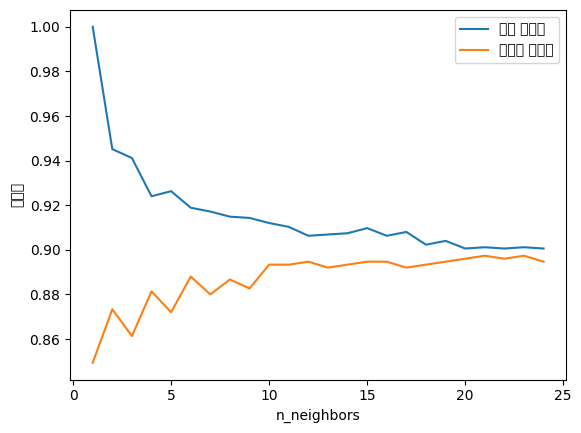

In [13]:
# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [14]:
from itertools import compress

neighbors_settings 
best_idx = test_accuracy==max(test_accuracy)

best_n = list(compress(neighbors_settings, best_idx))
print('Best neighbors:',best_n[0])

Best neighbors: 21


In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_k = best_n[0]
best_clf = KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(X_train, y_train)

train_pred_y = best_clf.predict(X_train)
test_pred_y = best_clf.predict(X_test)
tmp_acc = accuracy_score(y_test, test_pred_y)

print( "Best K is {}".format(best_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))

best_knn_conf = confusion_matrix(y_test, test_pred_y)

Best K is 21 , Test acuurcy: 0.8973


In [16]:
print(f'학습 정오행렬 \n{confusion_matrix(y_train, train_pred_y)}')
print(f'테스트 정오행렬 \n{confusion_matrix(y_test, test_pred_y)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, train_pred_y):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, test_pred_y):.4f}')

학습 정오행렬 
[[1564    7]
 [ 166   13]]
테스트 정오행렬 
[[670   3]
 [ 74   3]]

학습 정확도 : 0.9011
테스트 정확도 : 0.8973
